In [74]:
from concepts import Context
import pandas as pd

In [75]:
# cargar el dataframe
df_movies = pd.read_csv('data/movies_data_format_genres.csv')

df_movies.head()

,id,companies,director,genres,keywords,stars,title,writers,year,Thriller,...,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
0,1,Pixar Animation Studios|Walt Disney Pictures,John Lasseter,Family|Fantasy|Comedy|Adventure|Animation,claw crane|toy|cgi animation|cowboy|rivalry,Don Rickles|Tim Allen|Tom Hanks,Toy Story,Pete Docter|John Lasseter,1995,0,...,0,0,1,0,0,1,0,0,0,1
1,32,Atlas Entertainment|Universal Pictures|Classico,Terry Gilliam,Mystery|Thriller|Sci-Fi,mental institution|time travel|underground|psy...,Brad Pitt|Madeleine Stowe|Bruce Willis,Doce monos,Chris Marker|David Webb Peoples,1995,1,...,0,0,0,0,0,0,0,1,0,0
2,47,New Line Cinema|Juno Pix|Cecchi Gori Pictures,David Fincher,Mystery|Thriller|Drama|Crime,human monster|serial murder|seven deadly sins|...,Morgan Freeman|Brad Pitt|Kevin Spacey,Seven,Andrew Kevin Walker,1995,1,...,1,0,0,0,0,0,1,1,0,0
3,50,Spelling Films International|PolyGram Filmed E...,Bryan Singer,Mystery|Thriller|Crime,burying a body|suspect|criminal mastermind|dir...,Gabriel Byrne|Chazz Palminteri|Kevin Spacey,Sospechosos habituales,Christopher McQuarrie,1995,1,...,0,0,0,0,0,0,1,1,0,0
4,110,The Ladd Company|B.H. Finance C.V.|Icon Entert...,Mel Gibson,War|Biography|Drama|History,legend|14th century|revolt|scotland|england,Patrick McGoohan|Sophie Marceau|Mel Gibson,Braveheart,Randall Wallace,1995,0,...,1,0,0,0,1,0,0,0,1,0


In [76]:
df_movies[df_movies['id'] == 527]

,id,companies,director,genres,keywords,stars,title,writers,year,Thriller,...,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
19,527,Amblin Entertainment|Universal Pictures,Steven Spielberg,Biography|Drama|History,villa|soap|champagne|accountant|womanizer,Liam Neeson|Ben Kingsley|Ralph Fiennes,La lista de Schindler,Steven Zaillian|Thomas Keneally,1993,0,...,1,0,0,0,1,0,0,0,0,0


In [77]:
# adaptar el dataframe
# delete the non necessary columns

# guardo los ids, porque necesito la correspondencia entre ids y rows
df_ids = df_movies['id']

df_movies = df_movies.drop(['companies', 'director', 'genres', 'keywords', 'stars', 'title', 'writers', 'year', 'id'], axis=1)

df_movies.head()

,Thriller,Biography,Romance,Adventure,Sci-Fi,Comedy,Musical,Horror,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [78]:
# reemplazar los 1, por las X
df_movies = df_movies.replace([0, 1], ['', 'X'])

column_names = ['id'] + df_movies.columns.tolist() 
#print(column_names)

df_movies['id'] = df_ids

df_movies.head()

df_movies = df_movies[column_names]

df_movies.head()

,id,Thriller,Biography,Romance,Adventure,Sci-Fi,Comedy,Musical,Horror,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
0,1,,,,X,,X,,,,,X,,,X,,,,X
1,32,X,,,,X,,,,,,,,,,,X,,
2,47,X,,,,,,,,X,,,,,,X,X,,
3,50,X,,,,,,,,,,,,,,X,X,,
4,110,,X,,,,,,,X,,,,X,,,,X,


In [85]:
df_movies[df_movies['id'] == 110]

,id,Thriller,Biography,Romance,Adventure,Sci-Fi,Comedy,Musical,Horror,Drama,Action,Fantasy,Western,History,Family,Crime,Mystery,War,Animation
4,110,,X,,,,,,,X,,,,X,,,,X,


In [80]:
# pasarlo a un csv
df_movies.to_csv("data/fca.csv",index=False)

# en fca.csv tengo la estructura para crear el retculo, segun el formato de la libreria concepts

In [81]:
# crear el reticulo
r = Context.fromfile('data/fca.csv', frmat='csv')

#print(r)

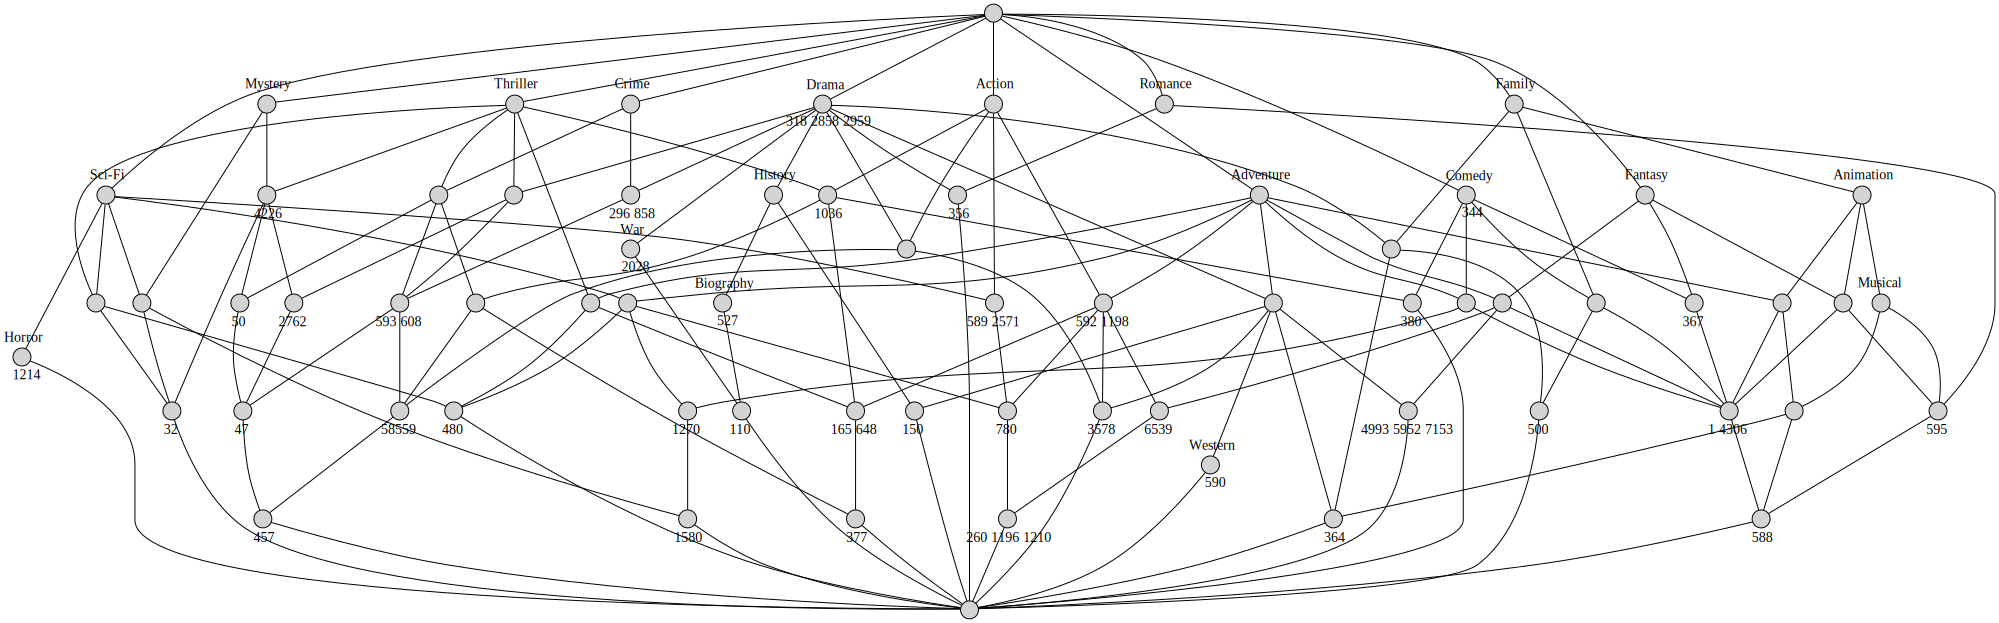

In [82]:
# visualizarlo
lat = r.lattice
lat.graphviz(view=True)

In [99]:
# muestra cada id con su lista de generos
#for extent, intent in lat:
#    print('%r %r' % (extent, intent))
#    print(len(extent)) # longitud de la primera tupla, que son los ids de las peliculas
#    print(len(intent)) # longitud de la segunda tupla, la lista de generos asociada al id de la pelicula

In [100]:
# voy a obtener la lista de peliculas con mayor numero de generos
# esto lo hacemos con el objetivo de encontrar la pelicula mas parecida (con mayor numero de generos en comun con la 
# pelicula recomendada)

# obtenemos la longitud de la lista con mayor numero de generos
max_size = max([len(intent) for extent, intent in lat if len(extent) != 0])

# obtenemos las peliculas que tienen mayor numero de generos
# (movie_id, genres_list)
similar_movies = [(extent, intent) for extent, intent in lat if len(intent) == max_size]

print(similar_movies)

[(('588',), ('Romance', 'Adventure', 'Comedy', 'Musical', 'Fantasy', 'Family', 'Animation'))]
